# Explore here

In [27]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [3]:
# Your code here
df = pd.read_csv('../data/raw/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [7]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [9]:
#borramos las filas de la masa muscular, la presion arterial y la glucosa a= 0 porque un paciente con
#estos valores, estaría muerto. Así que esto afectaría a nuestro dataframe porque son datos erróneos. 
df.drop(df[df['BMI'] == 0].index, inplace=True)
df.drop(df[df['BloodPressure'] == 0].index, inplace=True)
df.drop(df[df['Glucose'] == 0].index, inplace=True)

In [10]:
df.shape

(724, 9)

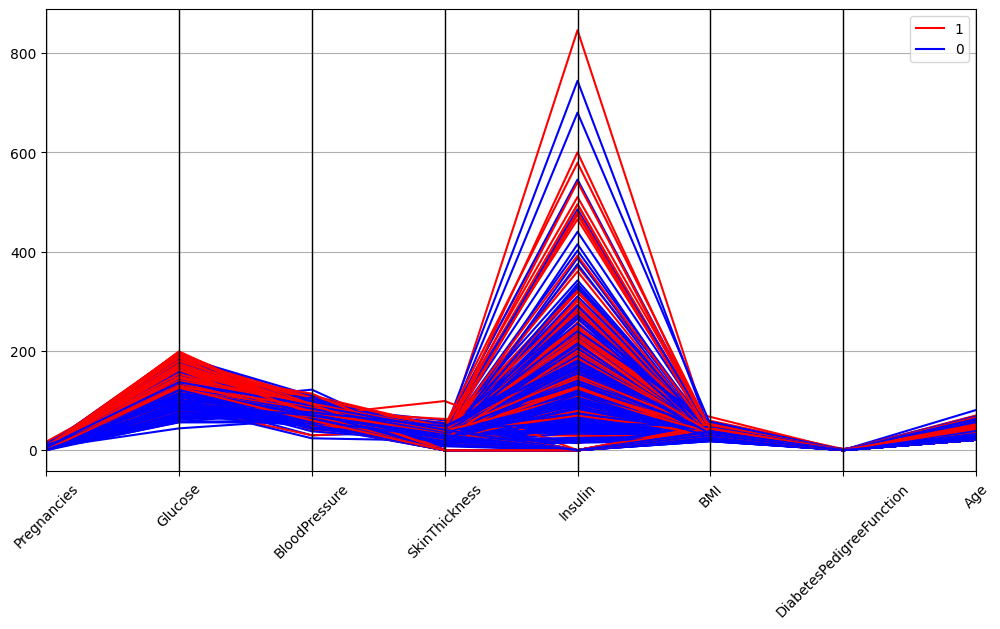

In [11]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [12]:
#hacemos prueba de test y train
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [13]:
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
simple_tree.fit(X_train, y_train)

complex_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=32)
complex_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=32)

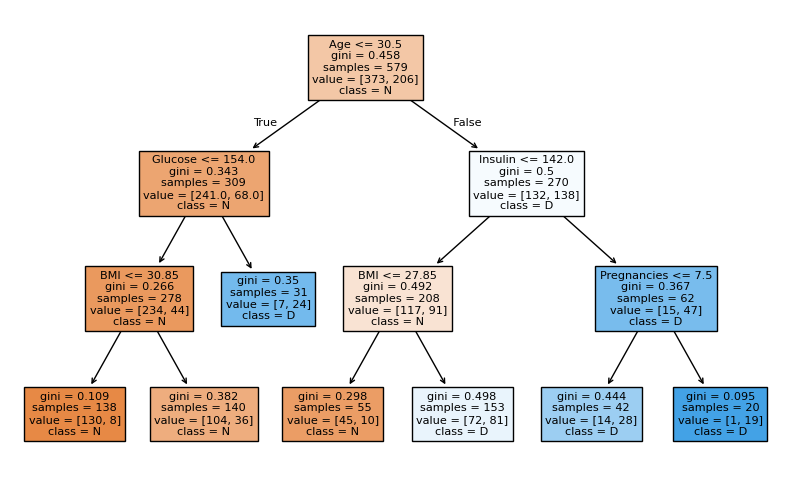

In [14]:
#vemos el arbol simple
plt.figure(figsize=(10, 6))
plot_tree(simple_tree,feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

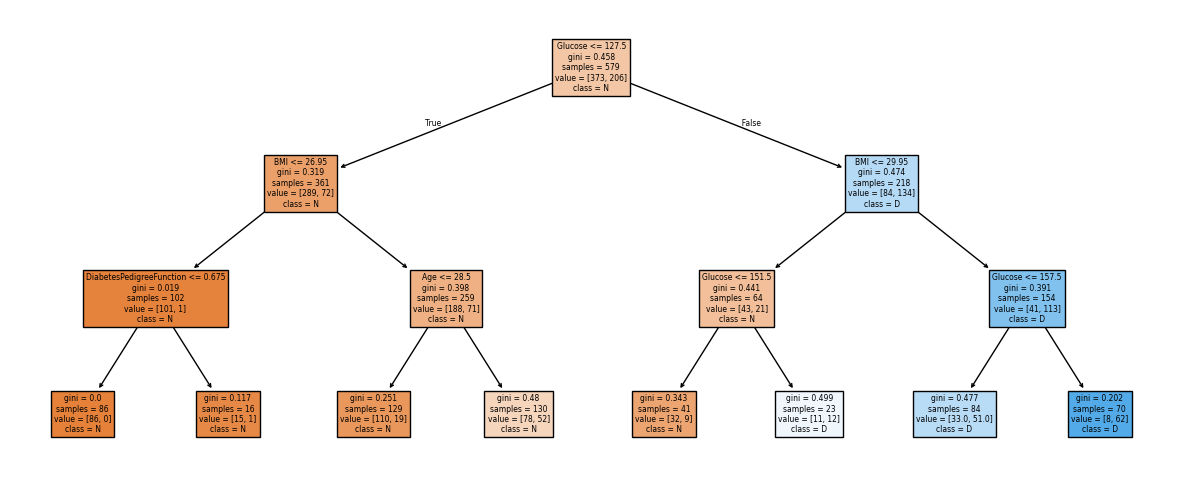

In [15]:
#vemos el arbol complejo
plt.figure(figsize=(15, 6))
plot_tree(complex_tree,feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

In [16]:
X_train[(X_train['Age']> 30.5) & (X_train['Glucose']>= 154)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
154,8,188,78,0,0,47.9,0.137,43
228,4,197,70,39,744,36.7,2.329,31
44,7,159,64,0,0,27.4,0.294,40
361,5,158,70,0,0,29.8,0.207,63
749,6,162,62,0,0,24.3,0.178,50
...,...,...,...,...,...,...,...,...
506,0,180,90,26,90,36.5,0.314,35
489,8,194,80,0,0,26.1,0.551,67
440,0,189,104,25,0,34.3,0.435,41
114,7,160,54,32,175,30.5,0.588,39


In [17]:
#caluclamos las metricas de entrenamiento y test y también sus diferencias 
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # creamos un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [18]:
#evaluamos el modelo simple y complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

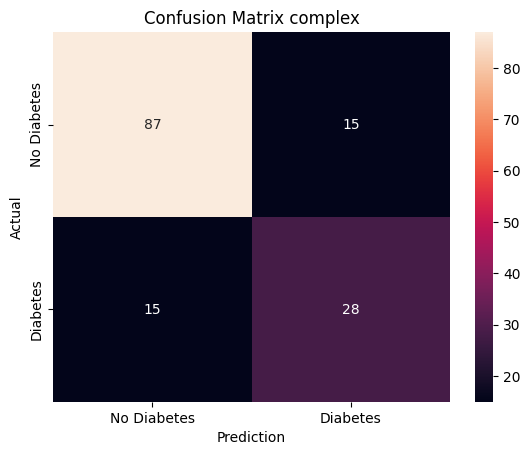

In [25]:
#MATRIZ DE CONFUSION DEL ARBOL COMPLEJO
cm = confusion_matrix(y_test, test_pred_complex)
sns.heatmap(cm,
            annot=True, 
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.title('Confusion Matrix complex')
plt.xlabel('Prediction')
plt.show()

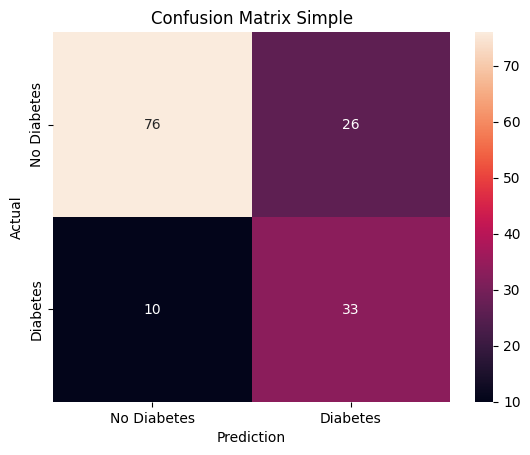

In [26]:
cm = confusion_matrix(y_test, test_pred_simple)
sns.heatmap(cm,
            annot=True, 
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.title('Confusion Matrix Simple')
plt.xlabel('Prediction')
plt.show()

In [21]:
#metricas del complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.770294,0.652742,0.733693,0.706215,0.606796,0.860590
Test,0.793103,0.651163,0.752052,0.651163,0.651163,0.852941
Diferencia,-0.022810,0.001579,-0.018359,0.055052,-0.044367,0.007649


In [22]:
#metricas del simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.744387,0.672566,0.742927,0.617886,0.737864,0.747989
Test,0.751724,0.647059,0.756270,0.559322,0.767442,0.745098
Diferencia,-0.007337,0.025508,-0.013343,0.058564,-0.029578,0.002891


Nos quedamos con el modelo comlejo porque tiene mayor accuracy, AUC, precision y specifity.
Aunque el modelo simple tiene mejor recall, es mejor tener mayor precisión porque minimiza los
falsos positivos.

In [ ]:
# DEFINIMOS HIPERPARÁMETROS PARA EL MODELO OPTIMIZADO
tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Creamos un objeto GridSearchCV para encontrar la mejor combinación de hiperparámetros y lo ajustamos al modelo entrenamiento
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=1)

In [ ]:
# Imprimimos los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
best_tree = grid_search.best_estimator_

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [ ]:
# Usamos el mejor modelo encontrado para predecir sobre el conjunto de entrenamiento, test y hacemos lasmetricas
train_pred_best = best_tree.predict(X_train)
test_pred_best = best_tree.predict(X_test)
get_metrics(y_train, y_test, train_pred_best, test_pred_best)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.804836,0.698667,0.767023,0.775148,0.635922,0.898123
Test,0.827586,0.691358,0.776562,0.736842,0.651163,0.901961
Diferencia,-0.022750,0.007309,-0.009539,0.038306,-0.015240,-0.003837


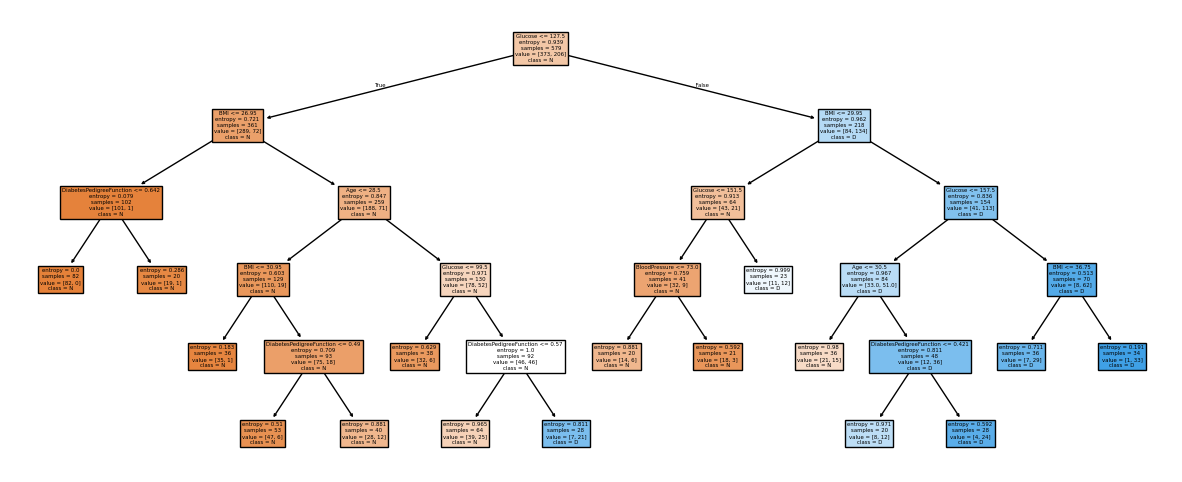

In [ ]:
# Visualizamos el árbol de decisión optimizado
plt.figure(figsize=(15, 6))
plot_tree(best_tree, feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

In [ ]:
#hacemos las metricas para comparar los árboles
def comparar_modelos(y_train, y_test, pred_train_simple, pred_test_simple,
                     pred_train_complex, pred_test_complex,
                     pred_train_opt, pred_test_opt):
    
    modelos = ['Simple', 'Complejo', 'Optimizado']
    metricas = []

    for y_pred_train, y_pred_test in [
        (pred_train_simple, pred_test_simple),
        (pred_train_complex, pred_test_complex),
        (pred_train_opt, pred_test_opt)
    ]:
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc = roc_auc_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        specificity = confusion_matrix(y_test, y_pred_test)[0,0] / sum(confusion_matrix(y_test, y_pred_test)[0])
        
        metricas.append([
            train_accuracy,
            test_accuracy,
            f1,
            auc,
            precision,
            recall,
            specificity
        ])
    
    df_comparativa = pd.DataFrame(metricas, columns=[
        'Accuracy (Train)', 'Accuracy (Test)', 'F1 Score', 'AUC',
        'Precision', 'Recall', 'Specificity'
    ], index=modelos)
    
    return df_comparativa.round(4)

In [ ]:
#hacemos la comparación
df_comparativa = comparar_modelos(
    y_train, y_test,
    train_pred_simple, test_pred_simple,
    train_pred_complex, test_pred_complex,
    train_pred_best, test_pred_best
)
print(df_comparativa)

            Accuracy (Train)  Accuracy (Test)  F1 Score     AUC  Precision  \
Simple                0.7444           0.7517    0.6471  0.7563     0.5593   
Complejo              0.7703           0.7931    0.6512  0.7521     0.6512   
Optimizado            0.8048           0.8276    0.6914  0.7766     0.7368   

            Recall  Specificity  
Simple      0.7674       0.7451  
Complejo    0.6512       0.8529  
Optimizado  0.6512       0.9020  


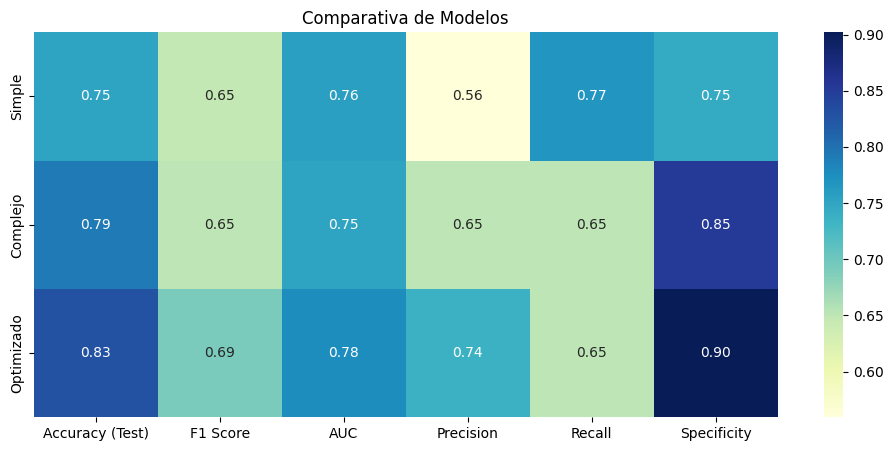

In [ ]:
#la comparacion en mapa de calor
plt.figure(figsize=(12, 5))
sns.heatmap(df_comparativa.iloc[:,1:], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Comparativa de Modelos")
plt.show()

El modelo optimizado tiene mejor rendimiento en todo menos en el recall, en comparación con los modelos simples y complejos. El modelo optimizado es el mejor para predecir correctamento los casos de diabetes